In [5]:
# Dataframe and arry
import numpy as np
import pandas as pd

# Historical data from binance
from binance.client import Client

# convert timestamp to Data and Time convert (UTC)
from datetime import datetime, date
import time 
# Tachnical Analysis
import ta

# Plot Graph
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [6]:
# init
API = 'E2IPk47ksqr1xVDosH5ZXJW5OfgbkcbXpzpAaEPB5XZYyGTkZtwQ8OKU7of1q4Oe'
Secret = 'XYRT81LfbdXdwwMmut0d9UXQSooPkKGC3vRjiX0qyoTjVWP2504hV5GwMLfZL7nG'

# Check Binance Status
client = Client(API, Secret)
status = client.get_system_status()
print(status)

{'status': 0, 'msg': 'normal'}


In [7]:
# Column Labels
row_col = [
    'OpenTime',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'CloseTime',
    'QuoteAssetVol',
    'NumberofTrades',
    'TakerbaseVol',
    'TakerquoteVol',
    'Ignor'
]

In [8]:
klines = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '360 day ago UTC')

In [9]:
row_df = pd.DataFrame(klines, columns=row_col)
row_df['OpenTime'] = pd.to_datetime(row_df['OpenTime'], unit='ms').dt.tz_localize('Asia/Bangkok')
row_df['CloseTime'] = pd.to_datetime(row_df['CloseTime'], unit='ms').dt.tz_localize('Asia/Bangkok')
row_df

,OpenTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVol,NumberofTrades,TakerbaseVol,TakerquoteVol,Ignor
0,2021-04-15 00:00:00+07:00,62959.53000000,63800.00000000,62020.00000000,63159.98000000,51649.70034000,2021-04-15 23:59:59.999000+07:00,3248931738.29318204,1938028,25628.16837900,1612303095.28825449,0
1,2021-04-16 00:00:00+07:00,63158.74000000,63520.61000000,60000.00000000,61334.80000000,91764.13988400,2021-04-16 23:59:59.999000+07:00,5647292669.61549332,2639940,43570.02314700,2680750914.50457292,0
2,2021-04-17 00:00:00+07:00,61334.81000000,62506.05000000,59580.91000000,60006.66000000,58912.25612800,2021-04-17 23:59:59.999000+07:00,3605701810.67504697,2268816,28386.27410600,1737722135.37950582,0
3,2021-04-18 00:00:00+07:00,60006.67000000,60499.00000000,50931.30000000,56150.01000000,124882.13182400,2021-04-18 23:59:59.999000+07:00,6949379727.42915424,3444089,59404.61680900,3303953081.09621833,0
4,2021-04-19 00:00:00+07:00,56150.01000000,57526.81000000,54221.58000000,55633.14000000,78229.04226700,2021-04-19 23:59:59.999000+07:00,4398619580.64714330,2390527,38362.38497900,2156617047.23873171,0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2022-04-05 00:00:00+07:00,46580.50000000,47200.00000000,45353.81000000,45497.55000000,42192.74852000,2022-04-05 23:59:59.999000+07:00,1951668192.92950980,1046080,20607.57735000,953494654.45992840,0
356,2022-04-06 00:00:00+07:00,45497.54000000,45507.14000000,43121.00000000,43170.47000000,60849.32936000,2022-04-06 23:59:59.999000+07:00,2700644700.89039180,1471912,29467.28381000,1307725131.19462540,0
357,2022-04-07 00:00:00+07:00,43170.47000000,43900.99000000,42727.35000000,43444.19000000,37396.54156000,2022-04-07 23:59:59.999000+07:00,1623879486.66003130,999816,18567.25999000,806358703.21566620,0
358,2022-04-08 00:00:00+07:00,43444.20000000,43970.62000000,42107.14000000,42252.01000000,42375.04203000,2022-04-08 23:59:59.999000+07:00,1830699971.61131170,1108136,20530.56354000,887196762.49432090,0


In [10]:
df = row_df[['Open','High','Low','Close','Volume']]
df.set_index(row_df['OpenTime'], inplace=True)
df = df.astype(float)

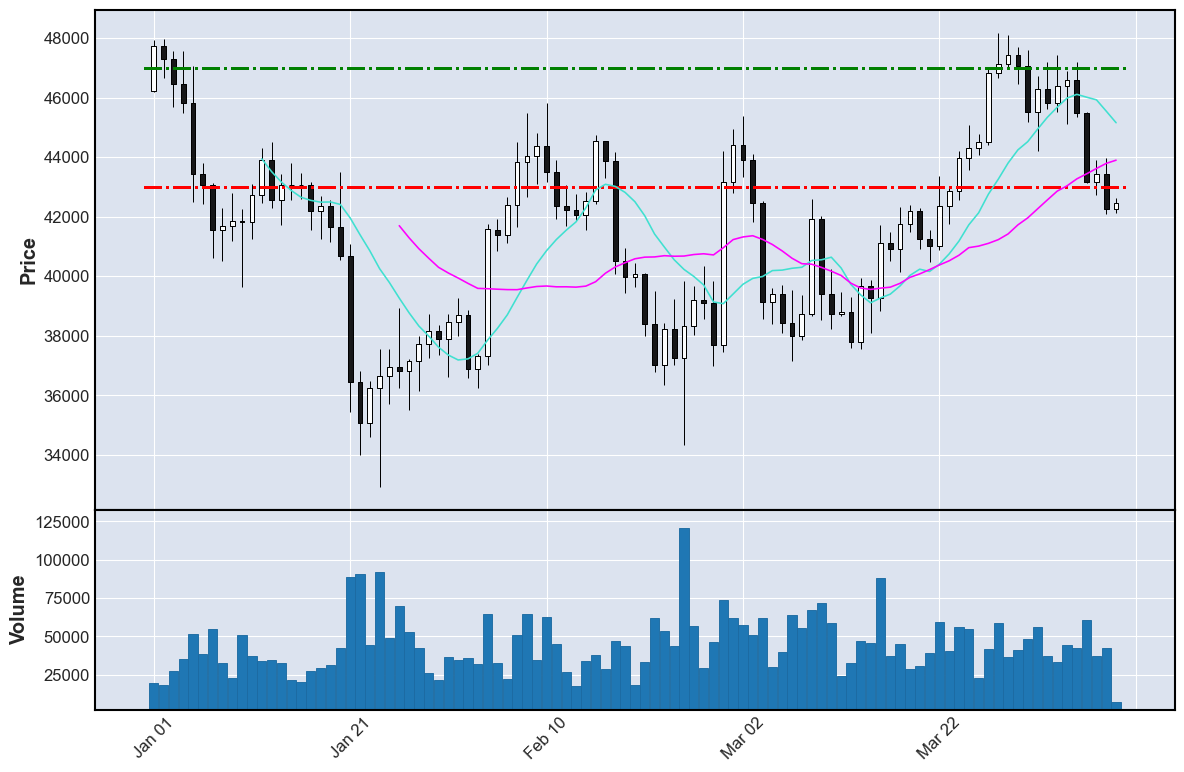

In [11]:
mpf.plot(df['2022-1':],mav=(12,26,100), type='candle', volume=True, figsize=(15,10), hlines=dict(hlines=[43000,47000], colors=['r','g'], linestyle='-.'))

In [12]:
df['Per'] = df.Close.pct_change()

In [13]:
ret_add = mpf.make_addplot(df['Per'],color='g',ylabel='per', panel=2,)

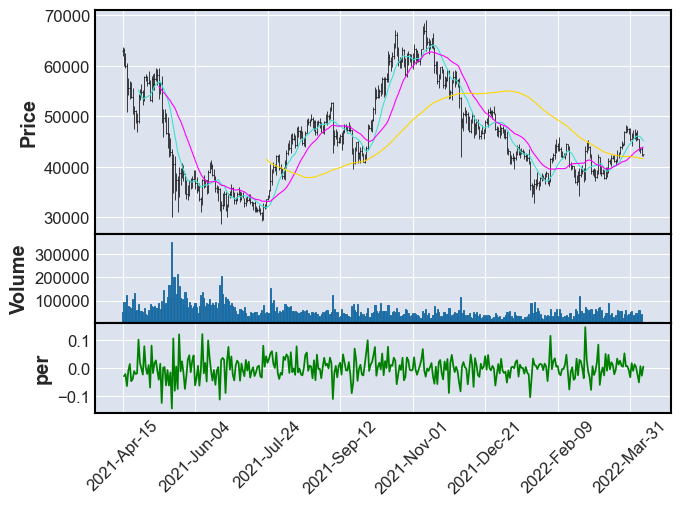

In [14]:
mpf.plot(df, addplot=ret_add, volume=True, mav=(12,26,100))

In [15]:
colprefix = ''
fillna = False
window_short = 13
window_long = 26

In [16]:
#EMA
indicator_short = ta.trend.EMAIndicator(
    close=df['Close'], window=window_short, fillna=fillna
)
indicator_long = ta.trend.EMAIndicator(
    close=df['Close'], window=window_long, fillna=fillna
)
df[f"{colprefix}ema_short"] = indicator_short.ema_indicator()
df[f"{colprefix}ema_long"] = indicator_long.ema_indicator()

In [17]:
####################
# Trend indicators #
####################
# MACD
indicator_macd = ta.trend.MACD(
    close=df['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=fillna
)
df[f"{colprefix}trend_macd"] = indicator_macd.macd()
df[f"{colprefix}trend_macd_signal"] = indicator_macd.macd_signal()
df[f"{colprefix}trend_macd_diff"] = indicator_macd.macd_diff()

In [18]:
#######################
# Momentam indicators #
#######################

# Relative Strength Index (RSI)
df[f"{colprefix}momentum_rsi"] = ta.momentum.RSIIndicator(
    close=df['Close'], window=14, fillna=fillna
).rsi()

In [40]:
df.dropna(inplace=True)

In [43]:
# ema_short = mpf.make_addplot(df['ema_short'],color='g',ylabel='ema_short', panel=0),
# ema_long = mpf.make_addplot(df['ema_long'],color='y',ylabel='ema_long', panel=0),
# RSI = mpf.make_addplot(df['momentum_rsi'],color='b',ylabel='RSI', panel=2)
# plot_list=[ema_short,ema_long,RSI]

In [44]:
# mpf.plot(df,addplot=[ema_short,ema_long,RSI], volume=True)

In [53]:
df['trend'] = df['ema_short'] > df['ema_long']
df['trend_shift'] = df.trend.shift(1)
df.loc[(df.trend == True) & (df.trend_shift == False),'action'] = 'buy'
df.loc[(df.trend == False) & (df.trend_shift == True),'action'] = 'sell'
df.loc[df['action'] == 'buy', 'marker_position'] = df['Close'] *0.99
df.loc[df['action'] == 'sell', 'marker_position'] = df['Close'] *1.01
df[df['action'].notnull()]

,Open,High,Low,Close,Volume,Per,ema_short,ema_long,trend_macd,trend_macd_signal,trend_macd_diff,momentum_rsi,trend,trend_shift,action,marker_position
OpenTime,,,,,,,,,,,,,,,,
2021-07-27 00:00:00+07:00,37241.33,39542.61,36383.00,39457.87,88397.267015,0.059624,34437.731337,34054.391640,500.152282,-399.068675,899.220957,69.218030,True,False,buy,39063.2913
2021-09-20 00:00:00+07:00,47241.75,47347.25,42500.00,43015.62,78003.524443,-0.089458,46739.561034,46855.613138,-171.157396,208.524263,-379.681659,39.029373,False,True,sell,43445.7762
2021-10-04 00:00:00+07:00,48200.01,49536.12,46891.00,49224.94,46796.493720,0.021264,45726.539838,45569.907812,231.129920,-510.448742,741.578661,60.156897,True,False,buy,48732.6906
2021-11-20 00:00:00+07:00,58057.10,59845.00,57353.00,59707.51,33811.590100,0.028513,61257.567812,61279.627704,-128.309338,845.879592,-974.188930,46.181101,False,True,sell,60304.5851
2022-02-09 00:00:00+07:00,44043.00,44799.00,43117.92,44372.72,34428.167290,0.007487,41192.292876,40949.724627,374.632642,-691.060233,1065.692875,64.438132,True,False,buy,43928.9928
2022-02-20 00:00:00+07:00,40079.17,40125.44,38000.00,38386.89,33439.290110,-0.042223,41168.088113,41265.774634,-125.421221,234.921837,-360.343058,38.759685,False,True,sell,38770.7589
2022-03-02 00:00:00+07:00,44421.20,45400.00,43334.09,43892.98,57782.650810,-0.011891,40943.793055,40777.199923,223.931006,-306.221942,530.152948,59.544895,True,False,buy,43454.0502
2022-03-05 00:00:00+07:00,39148.65,39613.24,38407.59,39397.96,30363.133410,0.006368,40661.653236,40669.825000,3.548012,-93.310334,96.858345,46.275147,False,True,sell,39791.9396
2022-03-19 00:00:00+07:00,41757.51,42400.00,41499.29,42201.13,29067.181080,0.010624,40418.602716,40276.223363,184.499773,-153.708000,338.207773,56.526857,True,False,buy,41779.1187


In [54]:
#buy action dataframe
a = df.loc[df.action == 'buy']

#sell action dataframe
b = df.loc[df.action == 'sell']

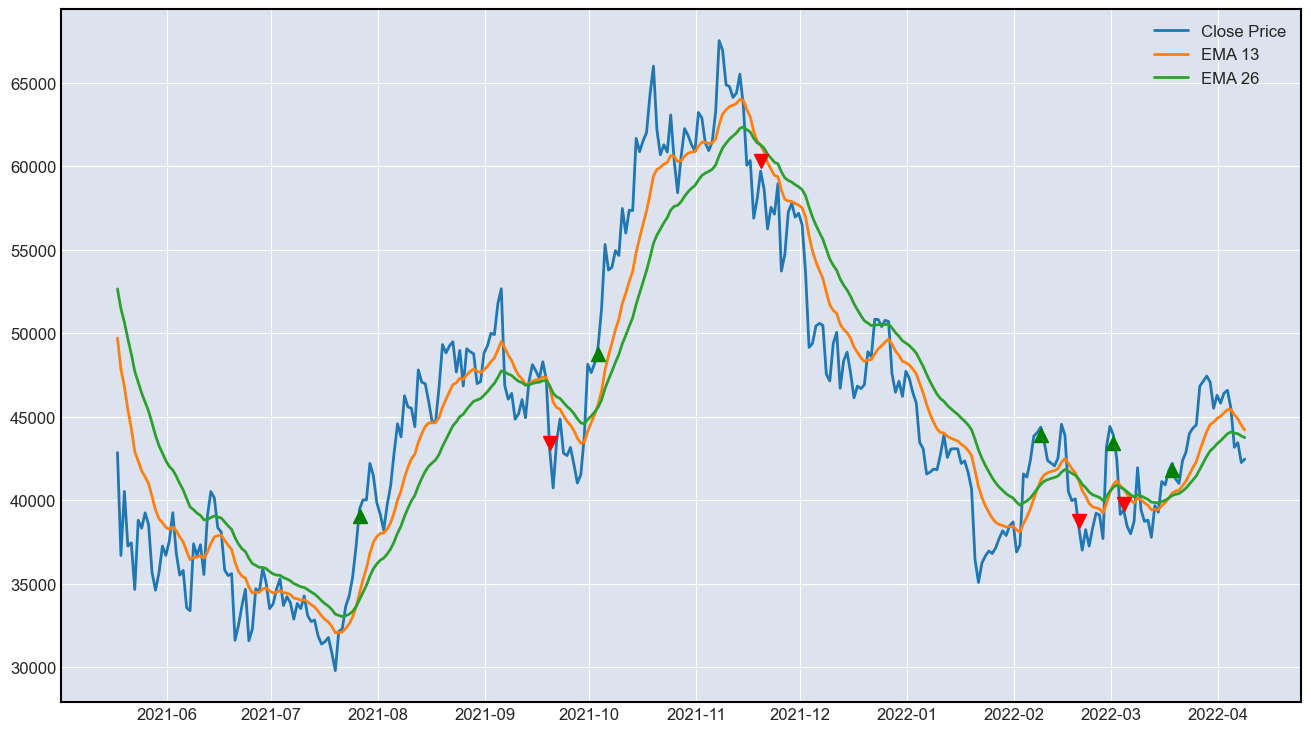

In [55]:
plt.figure(figsize=(16,9))
plt.plot(df.Close, label='Close Price')
plt.plot(df.ema_short, label='EMA 13')
plt.plot(df.ema_long, label='EMA 26')
plt.plot(a.marker_position, 'g^', markersize=10)
plt.plot(b.marker_position, 'rv', markersize=10)
plt.legend()

In [56]:
df['action_price'] = df['Open'].shift(-1)
df_txn = df.loc[df.action.notnull()]
df_txn['return'] = df_txn['action_price'].pct_change()

<ipython-input-56-c6a5344c91d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_txn['return'] = df_txn['action_price'].pct_change()


<AxesSubplot:xlabel='OpenTime'>

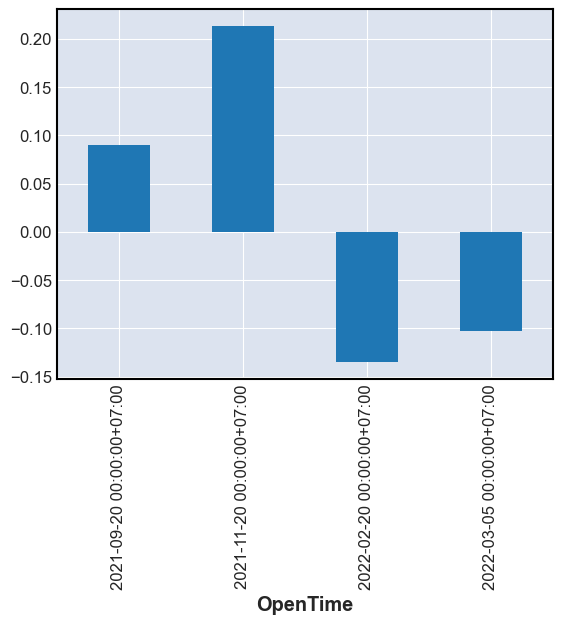

In [57]:
profit_s = df_txn[df_txn.action == 'sell']
profit_s['return'].plot(kind='bar')

<AxesSubplot:xlabel='OpenTime'>

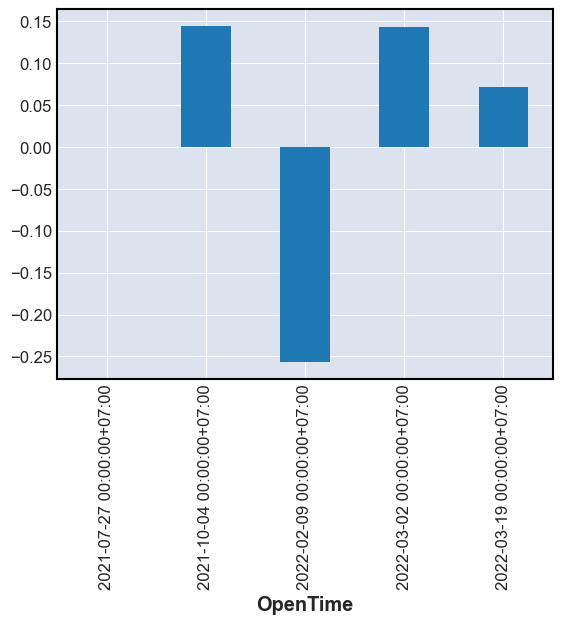

In [58]:
profit_b = df_txn[df_txn.action == 'buy']
profit_b['return'].plot(kind='bar')

In [59]:
df_txn[['action','action_price','return']]

,action,action_price,return
OpenTime,,,
2021-07-27 00:00:00+07:00,buy,39456.61,NaN
2021-09-20 00:00:00+07:00,sell,43016.64,0.090226
2021-10-04 00:00:00+07:00,buy,49224.93,0.144323
2021-11-20 00:00:00+07:00,sell,59707.52,0.212953
2022-02-09 00:00:00+07:00,buy,44372.71,-0.256832
2022-02-20 00:00:00+07:00,sell,38386.89,-0.134899
2022-03-02 00:00:00+07:00,buy,43892.99,0.143437
2022-03-05 00:00:00+07:00,sell,39397.97,-0.102409
2022-03-19 00:00:00+07:00,buy,42201.13,0.071150


In [62]:
profit_s['return'].mean()

0.016468008428637354

In [63]:
profit_b['return'].mean()

0.025519424924261347

In [ ]:
tuning_ema = []
for i in range(7,20):
    for j in range(22,30):
        colprefix = ''
        fillna = False
        window_short = i
        window_long = j
        val = [i,j,function(i,j,df)]
        tuning_ema.append(val)

In [ ]:
pd.DataFrame(tuneing_ema,columns=['short','long','return'])

In [66]:
symbol = 'BTCUSDT'

In [67]:
klines = client.get_historical_klines(symbol, Client.KLINE_INTERVAL_1DAY, '360 day ago UTC')
row_df = pd.DataFrame(klines, columns=row_col)
row_df['OpenTime'] = pd.to_datetime(row_df['OpenTime'], unit='ms').dt.tz_localize('Asia/Bangkok')
row_df['CloseTime'] = pd.to_datetime(row_df['CloseTime'], unit='ms').dt.tz_localize('Asia/Bangkok')
df = row_df[['Open','High','Low','Close','Volume']]
df.set_index(row_df['OpenTime'], inplace=True)
df = df.astype(float)
df['Per'] = df.Close.pct_change()

In [77]:
tuning_ema = []
for i in [5,7,9,13,15,16,17]:
    for j in [26,28,50]:
        colprefix = ''
        fillna = False
        val = [i,j,cal_return(i,j,df)]
        tuning_ema.append(val)

<ipython-input-76-80877b17e73c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_txn['return'] = df_txn['action_price'].pct_change()
<ipython-input-76-80877b17e73c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_txn['return'] = df_txn['action_price'].pct_change()
<ipython-input-76-80877b17e73c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [79]:
def cal_return(short,long,df):
    s = ta.trend.EMAIndicator(
        close=df['Close'], window=short, fillna=fillna
    )
    l = ta.trend.EMAIndicator(
        close=df['Close'], window=long, fillna=fillna
    )
    df["ema_short"] = s.ema_indicator()
    df["ema_long"] = l.ema_indicator()
    df['trend'] = df['ema_short'] > df['ema_long']
    df['trend_shift'] = df.trend.shift(1)
    df.loc[(df.trend == True) & (df.trend_shift == False),'action'] = 'buy'
    df.loc[(df.trend == False) & (df.trend_shift == True),'action'] = 'sell'
    df['action_price'] = df['Open'].shift(-1)
    df_txn = df.loc[df.action.notnull()]
    df_txn['return'] = df_txn['action_price'].pct_change()
    profit_s = df_txn[df_txn.action == 'sell']
    
    return roll(profit_s['return'].mean(),4)

In [78]:
tuning_ema

[[5, 26, -0.012807978907943293],
 [5, 28, -0.012263113775589368],
 [5, 50, -0.011507742912224716],
 [7, 26, -0.011507742912224716],
 [7, 28, -0.011507742912224716],
 [7, 50, -0.011507742912224716],
 [9, 26, -0.011507742912224716],
 [9, 28, -0.011507742912224716],
 [9, 50, -0.011996993453786964],
 [13, 26, -0.011996993453786964],
 [13, 28, -0.011996993453786964],
 [13, 50, -0.011883455754724668],
 [15, 26, -0.011883455754724668],
 [15, 28, -0.011883455754724668],
 [15, 50, -0.01252042636317835],
 [16, 26, -0.01252042636317835],
 [16, 28, -0.01252042636317835],
 [16, 50, -0.010608226550929769],
 [17, 26, -0.010608226550929769],
 [17, 28, -0.010608226550929769],
 [17, 50, -0.01054121227107584]]

In [89]:
df_txn['return'] = df_txn['action_price'].pct_change()

TypeError: unsupported operand type(s) for /: 'method' and 'float'